In [1]:
%reload_ext autoreload
%autoreload 2

from data import get_err_dicts
from plotter import plot_error_rates


DEVICE = 'ibm_sherbrooke'
STATE = 'X1'


round_err_dict = {}
for ROUNDS in [10, 20, 30, 40, 50, 75, 100]:
    file_name = f'../../results/{DEVICE}_{STATE}_{ROUNDS}.json'
    try:
        _, err_per_method = get_err_dicts(file_name)
        round_err_dict[ROUNDS] = err_per_method
    except:
        continue

print(round_err_dict)
distances = [51, 49, 47, 45, 43, 41, 39, 37, 35, 33, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3]


{10: {'s_KPS': {'d': [51, 49, 47, 45, 43, 41, 39, 37, 35, 33, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3], 'errs': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.0, 29.0, 97.0, 312.0, 884.0, 2696.0, 7836.0, 21990.0, 63730.0, 201111.0, 619491.0], 'tot_shots': [261000, 522000, 783000, 1044000, 1305000, 1566000, 1827000, 2088000, 2349000, 2610000, 2871000, 3132000, 3393000, 3654000, 3915000, 4176000, 4437000, 4698000, 4959000, 5220000, 5481000, 5742000, 6003000, 6264000, 6525000]}, 'h_KPS': {'d': [51, 49, 47, 45, 43, 41, 39, 37, 35, 33, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3], 'errs': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 7.0, 18.0, 70.0, 183.0, 546.0, 1477.0, 4343.0, 11846.0, 30063.0, 80089.0, 229348.0, 670858.0], 'tot_shots': [261000, 522000, 783000, 1044000, 1305000, 1566000, 1827000, 2088000, 2349000, 2610000, 2871000, 3132000, 3393000, 3654000, 3915000, 4176000, 4437000, 4698000, 4959000, 5220000, 54810

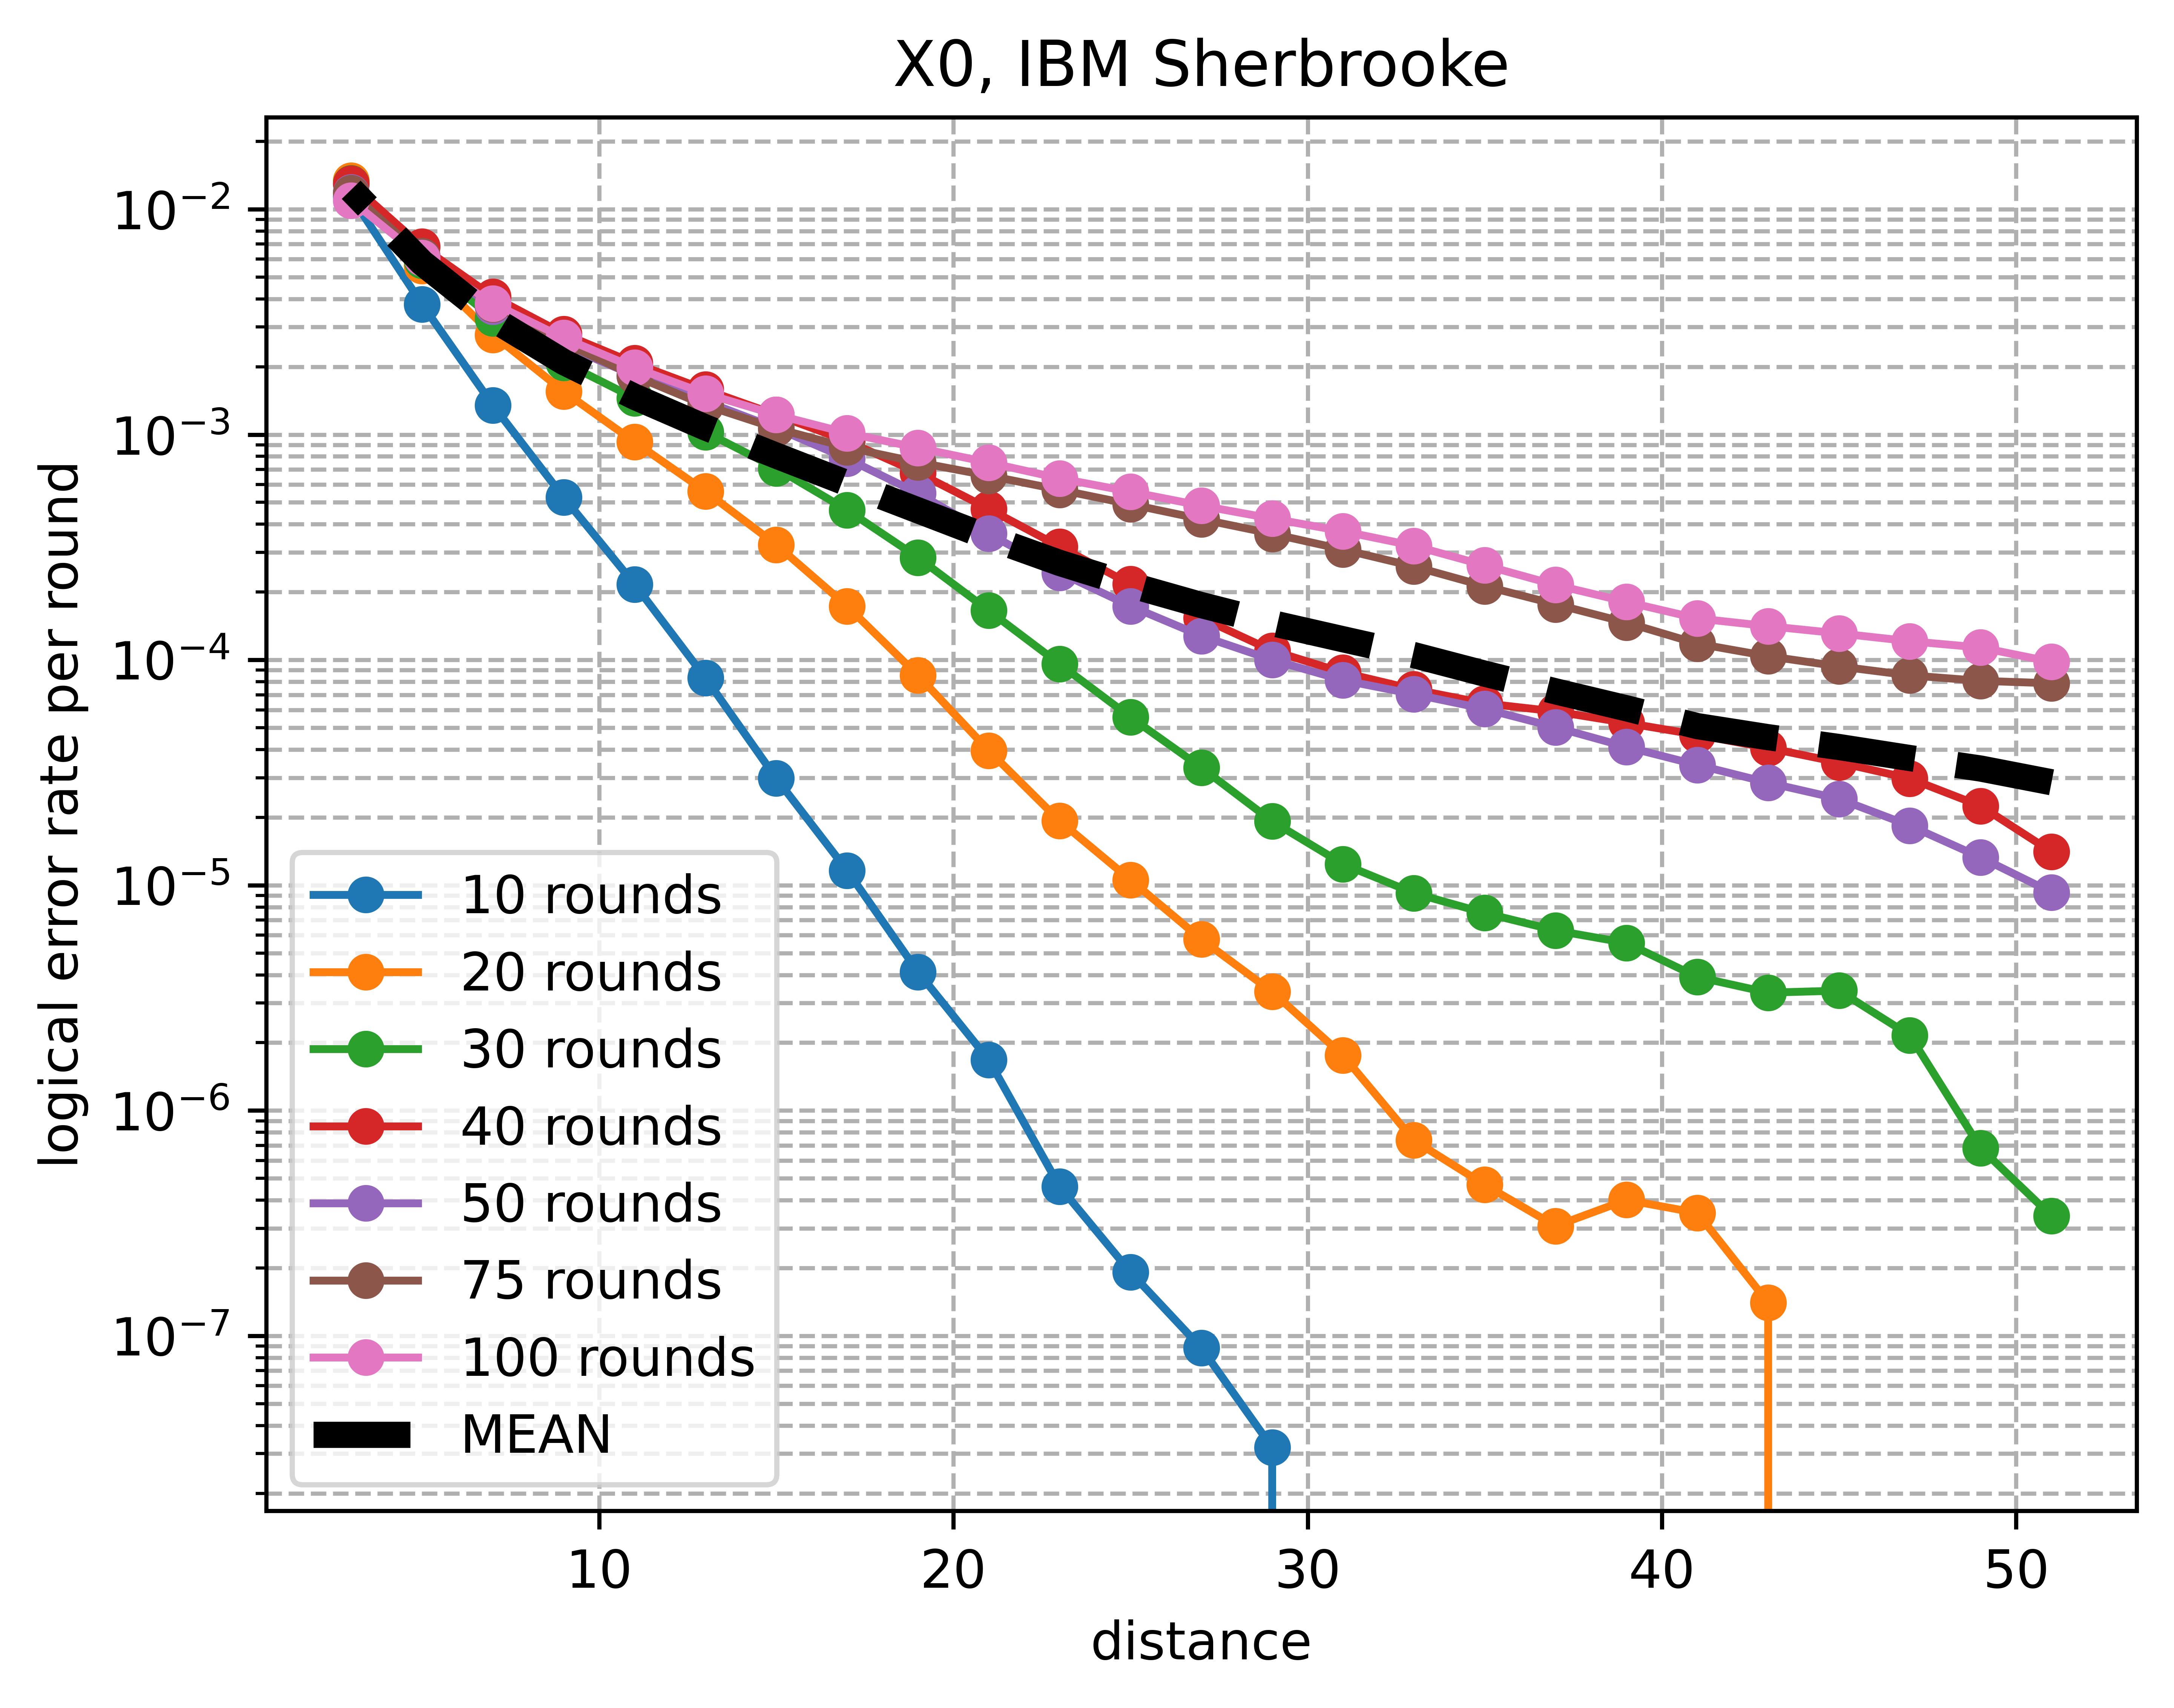

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logical_err_rate_per_round(p, T):
    return (1-np.exp(1/T * np.log(1-2*p)))/2


plt.figure(dpi=1000)
method = 'h_KPS'
rounds = list(round_err_dict.keys())
e_Lss= []
for T in rounds:
    ds = np.array(round_err_dict[T][method]['d'])
    errs = np.array(round_err_dict[T][method]['errs'])
    shots = np.array(round_err_dict[T][method]['tot_shots'])
    ps = errs/shots
    e_Ls = logical_err_rate_per_round(ps, T)
    e_Lss.append(e_Ls)
    
    plt.plot(ds, e_Ls,  label=f"{T} rounds", marker='o')

# e_Lss_log = np.log10(np.array(e_Lss)+1e-20)
# print(e_Lss_log)
# mean_e_L_log = np.mean(e_Lss_log, axis = 0)
# print()
# print(mean_e_L_log)
# mean_e_L = np.exp(mean_e_L_log)O
# print()
# print(mean_e_L)

mean_e_L = np.mean(np.array(e_Lss), axis = 0)
plt.plot(ds, mean_e_L, label='MEAN', linewidth=5, color='black', linestyle='--')

plt.grid(which='both', linestyle='--')
plt.xlabel('distance')
plt.ylabel('logical error rate per round')
plt.yscale('log')
plt.title("X0, IBM Sherbrooke")
plt.legend()

